In [1]:
pip install numpy

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------- ----- 10.7/12.6 MB 51.7 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 43.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 40.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 49.1 MB/s eta 0:00:00


In [5]:
import csv
import numpy as np

def read_and_extract_column(filename, column_name, dtype=float):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Skip the first row
        col_index = header.index(column_name)
        column_data = np.array([dtype(row[col_index]) for row in reader if row[col_index]])  # Convert to the specified dtype
    return column_data

filename = 'russia_losses_equipment.csv'
tank_data = read_and_extract_column(filename, 'tank', dtype=int)  

print(tank_data)

[9350 9338 9330 9319 9300 9276 9253 9249 9238 9233 9224 9214 9208 9193
 9182 9170 9162 9156 9137 9129 9120 9113 9109 9097 9090 9088 9079 9071
 9047 9035 9027 9014 8997 8988 8975 8971 8962 8953 8945 8944 8940 8933
 8919 8916 8908 8893 8887 8883 8874 8869 8860 8846 8825 8815 8800 8784
 8768 8746 8725 8705 8691 8685 8683 8680 8674 8671 8653 8642 8640 8639
 8636 8632 8631 8624 8618 8611 8601 8592 8582 8574 8571 8568 8563 8551
 8547 8542 8533 8529 8522 8518 8513 8508 8501 8496 8484 8476 8455 8450
 8447 8441 8434 8431 8429 8421 8417 8411 8406 8402 8399 8390 8381 8356
 8344 8331 8320 8313 8302 8288 8284 8266 8257 8250 8245 8238 8227 8214
 8206 8199 8191 8182 8180 8178 8171 8155 8153 8142 8132 8123 8107 8099
 8080 8073 8066 8042 8039 8035 8031 8019 8009 8001 7987 7984 7974 7958
 7956 7956 7936 7928 7911 7902 7879 7869 7843 7834 7828 7806 7794 7779
 7765 7740 7728 7710 7700 7692 7671 7662 7650 7635 7622 7611 7605 7590
 7576 7560 7547 7529 7510 7496 7485 7454 7449 7434 7429 7418 7405 7380
 7375 

In [6]:
daily_losses = np.diff(tank_data)
print(daily_losses)

[-12  -8 -11 -19 -24 -23  -4 -11  -5  -9 -10  -6 -15 -11 -12  -8  -6 -19
  -8  -9  -7  -4 -12  -7  -2  -9  -8 -24 -12  -8 -13 -17  -9 -13  -4  -9
  -9  -8  -1  -4  -7 -14  -3  -8 -15  -6  -4  -9  -5  -9 -14 -21 -10 -15
 -16 -16 -22 -21 -20 -14  -6  -2  -3  -6  -3 -18 -11  -2  -1  -3  -4  -1
  -7  -6  -7 -10  -9 -10  -8  -3  -3  -5 -12  -4  -5  -9  -4  -7  -4  -5
  -5  -7  -5 -12  -8 -21  -5  -3  -6  -7  -3  -2  -8  -4  -6  -5  -4  -3
  -9  -9 -25 -12 -13 -11  -7 -11 -14  -4 -18  -9  -7  -5  -7 -11 -13  -8
  -7  -8  -9  -2  -2  -7 -16  -2 -11 -10  -9 -16  -8 -19  -7  -7 -24  -3
  -4  -4 -12 -10  -8 -14  -3 -10 -16  -2   0 -20  -8 -17  -9 -23 -10 -26
  -9  -6 -22 -12 -15 -14 -25 -12 -18 -10  -8 -21  -9 -12 -15 -13 -11  -6
 -15 -14 -16 -13 -18 -19 -14 -11 -31  -5 -15  -5 -11 -13 -25  -5  -9 -12
 -22 -20  -5 -22  -6 -11  -6  -7 -13  -1  -5  -7 -16  -8  -9  -3  -4  -9
  -6  -5 -23  -9  -5 -22 -23 -13 -17 -24 -15  -9 -11 -12 -20 -15 -29  -8
 -10 -11  -6 -11 -24 -12  -8  -4  -9 -10 -19 -11 -2

In [7]:
four_greatest_losses = np.sort(daily_losses)[:4]
print(four_greatest_losses)

[-66 -55 -48 -44]


In [11]:
import csv
import numpy as np
from datetime import datetime

def read_csv_column(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)  
        column_index = headers.index(column_name)
        column_data = [row[column_index] for row in reader if row[column_index]]  

        if column_name == 'date':
            return np.array(column_data) 
        else:
            return np.array(column_data, dtype=float)  


filename = 'russia_losses_equipment.csv'
date_data = read_csv_column(filename, 'date')  
tank_data = read_csv_column(filename, 'tank')  


dates_as_dt = np.array([datetime.strptime(date, '%Y-%m-%d') for date in date_data])


first_day_of_spring = datetime(2024, 3, 1)
last_day_of_spring = datetime(2024, 5, 31)


spring_mask = (dates_as_dt >= first_day_of_spring) & (dates_as_dt <= last_day_of_spring)
spring_tank_data = tank_data[spring_mask]


if len(spring_tank_data) > 0:
    tank_losses_first_day = spring_tank_data[0]
    tank_losses_last_day = spring_tank_data[-1]
    difference = tank_losses_last_day - tank_losses_first_day
    print(f"Tanks destroyed in the spring of 2024: {int(difference)}")
else:
    print("No data available for the spring of 2024.")


Tanks destroyed in the spring of 2024: -1118


In [12]:
mean_last_100_days = np.sum(daily_losses[:100])
print(f"Mean value of destroyed tanks in the last 100 days of war: {int(abs(mean_last_100_days))}")

Mean value of destroyed tanks in the last 100 days of war: 916


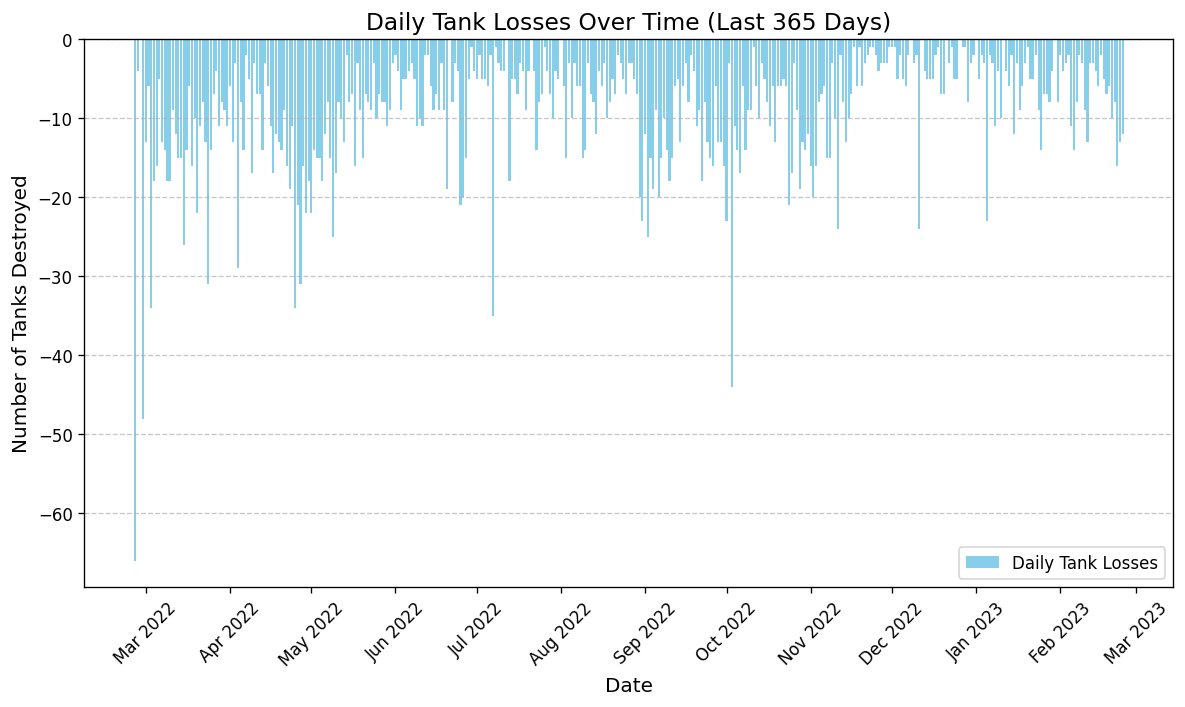

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_tank_losses(daily_losses, date_data):
    # Last 365 days data (adjust if less than 365 entries)
    last_n_days = min(len(daily_losses), 365)
    losses_last_year = daily_losses[-last_n_days:]
    dates_last_year = date_data[-last_n_days:]

    # Convert dates to datetime objects for better plotting
    dates_as_dt = [datetime.strptime(date, '%Y-%m-%d') for date in dates_last_year]

    # Plot the data as a bar chart
    plt.figure(figsize=(10, 6), dpi=120)  
    plt.bar(dates_as_dt, losses_last_year, color='skyblue', label='Daily Tank Losses')

    # Format the date on the x-axis for better readability
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Tick every month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2024'

    plt.title('Daily Tank Losses Over Time (Last 365 Days)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Tanks Destroyed', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

# Örnek çağrı
date_data = read_csv_column(filename, 'date')  # CSV'den tarih sütununu oku
daily_losses = np.diff(read_csv_column(filename, 'tank'))  # Günlük kayıpları hesapla
plot_tank_losses(daily_losses, date_data)
